In [3]:
from sklearn.datasets import fetch_20newsgroups
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [5]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nikhi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nikhi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# 1

In [8]:
data = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
documents = data.data

# 2

In [11]:
# Preprocessing function
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text.lower())
    
    # Remove punctuation and non-alphabetic tokens
    tokens = [word for word in tokens if word.isalpha()]
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    # Stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]
    
    return ' '.join(tokens)

# Apply preprocessing
preprocessed_documents = [preprocess_text(doc) for doc in documents]


# 3

In [14]:
# Vectorize the preprocessed text
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
bag_of_words = vectorizer.fit_transform(preprocessed_documents)

# 4

In [17]:
# Apply Latent Dirichlet Allocation (LDA)
lda_model = LatentDirichletAllocation(n_components=5, random_state=42)
lda_model.fit(bag_of_words)

# Extract topics
words = vectorizer.get_feature_names_out()
topics = []
for topic_idx, topic in enumerate(lda_model.components_):
    topic_words = [words[i] for i in topic.argsort()[:-11:-1]]
    topics.append(f"Topic {topic_idx + 1}: {' '.join(topic_words)}")

# 5

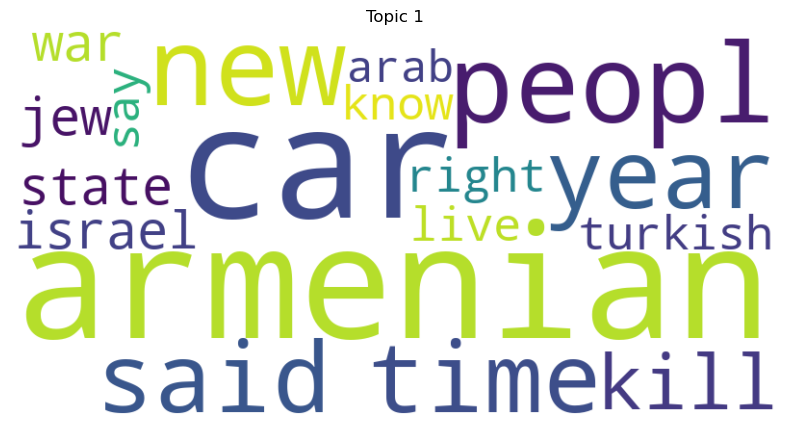

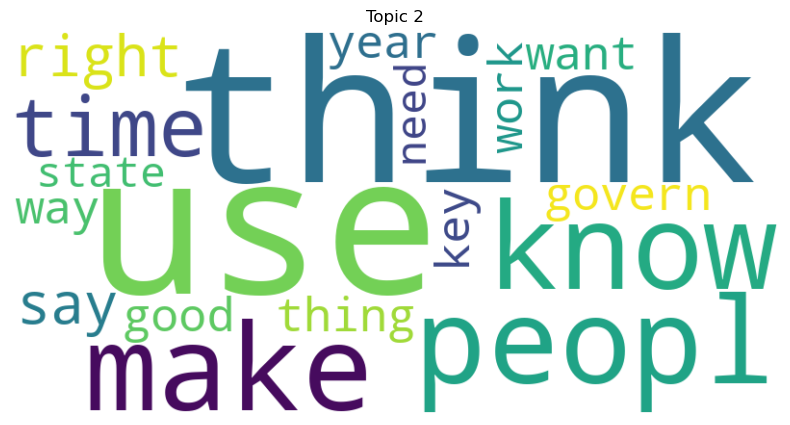

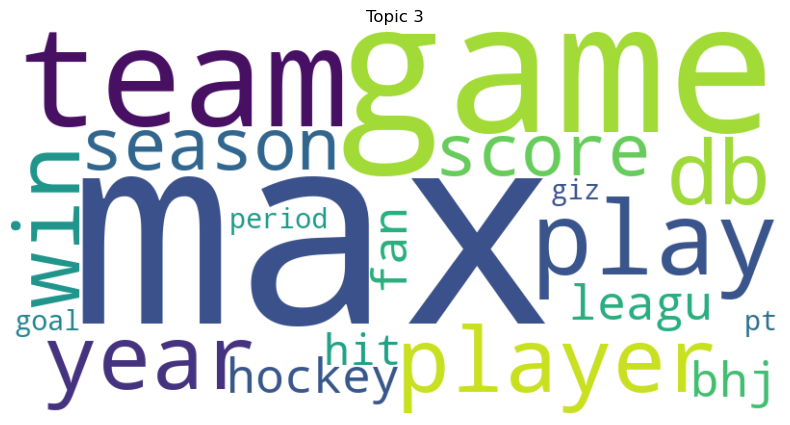

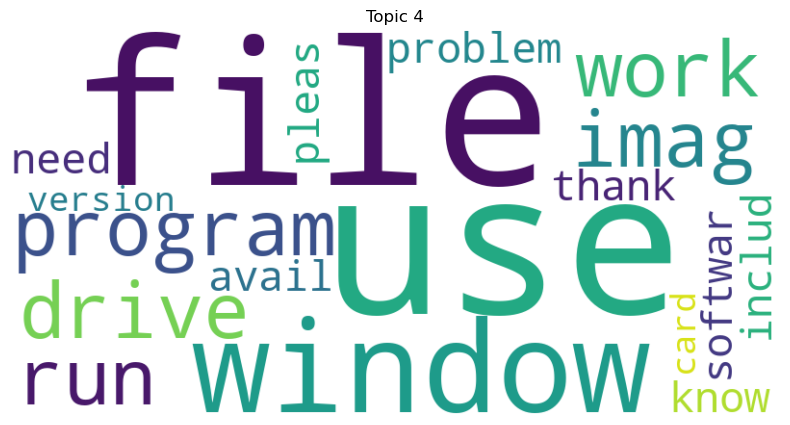

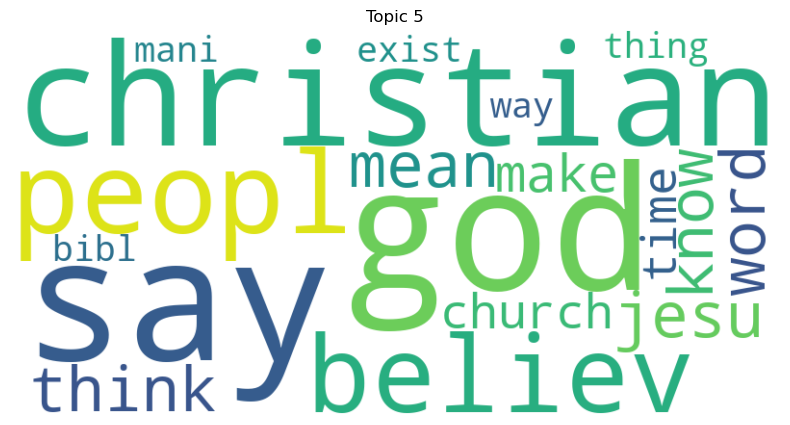

In [20]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate Word Clouds for Topics
for i, topic in enumerate(lda_model.components_):
    word_cloud = WordCloud(width=800, height=400, background_color='white').generate(
        ' '.join([words[j] for j in topic.argsort()[:-20:-1]])
    )
    plt.figure(figsize=(10, 5))
    plt.imshow(word_cloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Topic {i + 1}")
    plt.show()


In [22]:
pip install gensim


Note: you may need to restart the kernel to use updated packages.


In [26]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Compute Coherence for Each Topic
def compute_coherence(lda_model, bag_of_words, feature_names):
    coherence_scores = []
    for topic_idx, topic in enumerate(lda_model.components_):
        # Get Top Words for the Topic
        top_word_indices = topic.argsort()[:-11:-1]
        top_word_vectors = bag_of_words[:, top_word_indices].toarray()

        # Compute Pairwise Similarity of Word Vectors
        similarity_matrix = cosine_similarity(top_word_vectors.T)
        coherence_score = np.mean(similarity_matrix[np.triu_indices_from(similarity_matrix, k=1)])
        coherence_scores.append(coherence_score)
    return coherence_scores

coherence_scores = compute_coherence(lda_model, bag_of_words, words)
print(f"Cosine Similarity Coherence Scores: {coherence_scores}")


Cosine Similarity Coherence Scores: [0.2537827201134672, 0.43983988793650436, 0.25201149989847016, 0.31968970998631085, 0.33768084942027615]
